# Final Project 

#### Objective

Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan

#### Tentang Organisasi
HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam.

#### Permasalahan:
HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

In [1]:
#import library yang dibutuhkan 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#memuat data yang akan dianalisis
df = pd.read_csv('Data_Negara_HELP.csv')
#melihat jenis dan kategori data (5 data teratas)
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [2]:
#mencari informasi yang dimuat dari data
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Berdasarkan data tersebut didapatkan nilai max dan min yang cukup signifikan untuk setiap kategori. Hal ini menunjukkan bahwa terdapat adanya kesenjangan di beberapa negara terhadap kategori tersebut.

In [3]:
#mencari jenis data yang akan dianalisis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
#mencari apakah terdapat data yang hilang (missing values)
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

Berdasarkan hasil tersebut maka data sudah bisa diolah karena tidak terdapat data yang hilang (missing values) sehingga tidak perlu dilakukan penanganan data hilang (handling missing values)

<function matplotlib.pyplot.show(close=None, block=None)>

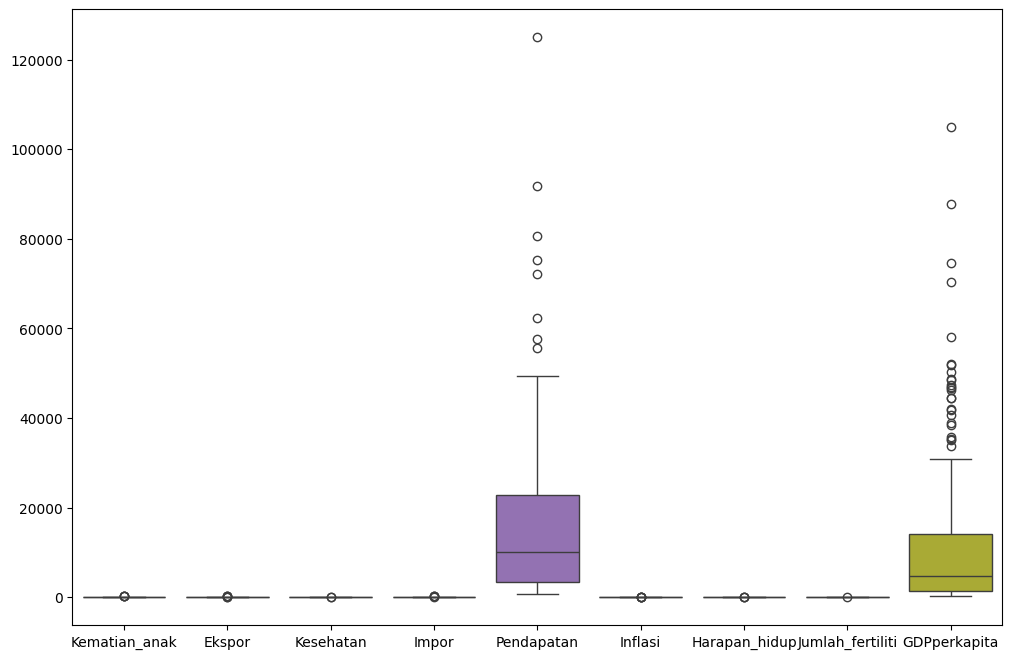

In [5]:
#mencari apakah terdapat outlier di dalam data
plt.figure(figsize= (12,8))
sns.boxplot(data=df)
plt.show

Berdasarkan grafik tersebut, maka terdapat outlier pada kolom pendapatan dan GDP perkapita sehingga akan dilakukan penghilangan outlier terlebih dahulu.

In [6]:
df_proses=df.drop('Negara', axis=1)

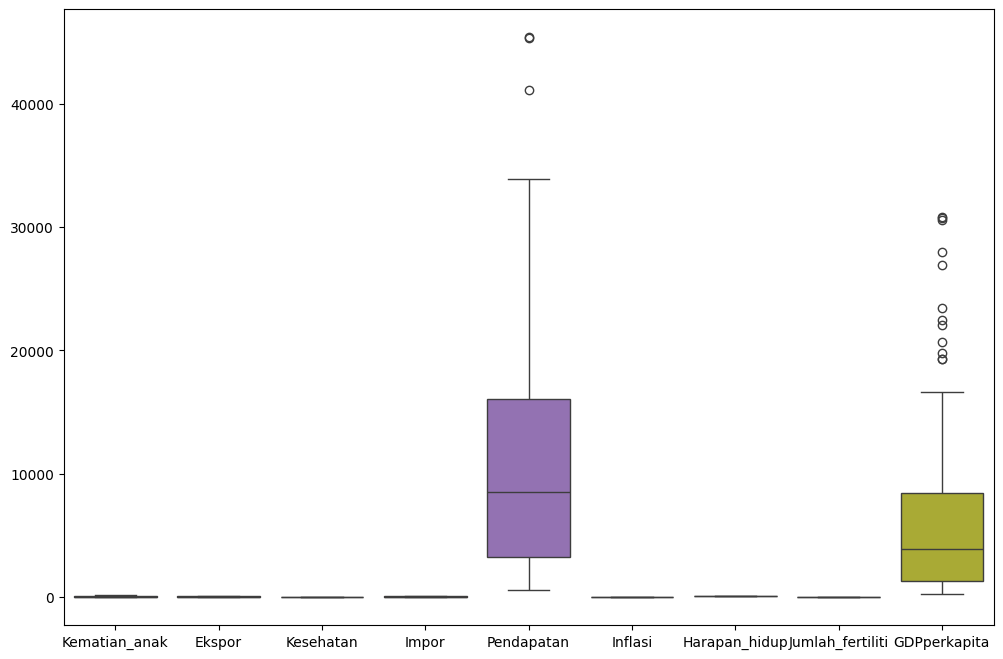

In [7]:
#handling outlier kolom pendapatan dan GDP perkapita
def hapus_outlier_IQR(df):
    Q1= df.quantile(0.25)
    Q3= df.quantile(0.75)
    IQR= Q3-Q1
    df_akhir=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_akhir

df_hapus_outlier=hapus_outlier_IQR(df_proses)
df_hapus_outlier.dropna(axis=0, inplace=True)
plt.figure(figsize= (12,8))
sns.boxplot(data=df_hapus_outlier)
plt.show()

Data telah dilakukan penanganan outlier (handling outliers, df yang selanjunta akan digunakan yaitu df_hapus_outlier (sudah dikeluarkan outliernya dan dihilangkan juga kategori negara karena memiliki tipe data object)

<Axes: >

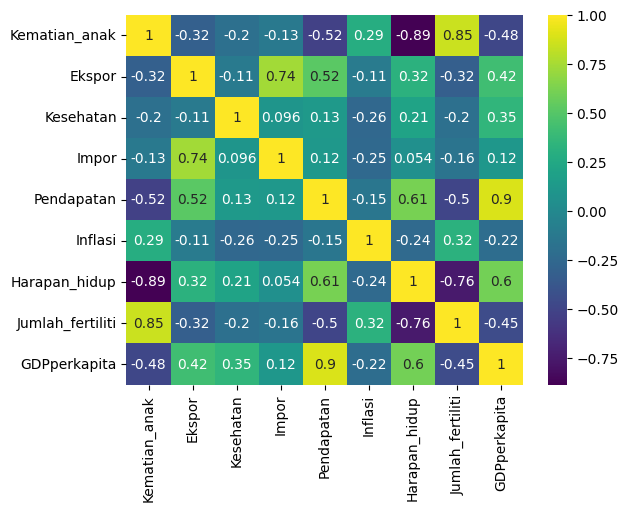

In [8]:
#dilakukan analisis korelasi terhadap masing-masing kategori agar didapatkan hubungan dari kategori yang ada
sns.heatmap(df_proses.corr(), cmap= 'viridis', annot=True)

Berdasarkan data korelasi tersebut didapatkan bahwa adanya korelasi yang tinggi antara GDP perkapita dengan pendapatan. GDP juga berkaitan dengan ekspor, kesehatan, dan harapan hidup. Kemudian, ada juga korelasi yang tinggi antara kematian anak dengan jumlah fertiliti. Kesimpulan yang dapat dikategorikan sebagai hubungan ekonomi dan kesehatan yaitu adanya hubungan yang tidak signifikan antara kematian anak dan pendapatan. Hal tersebut berarti apabila pendapatan rendah, maka akan terjadi kematian anak yang tinggi, begitu juga sebaliknya. Maka dari itu idealnya data utama yang akan dilihat untuk kategori ini adalah GDP dan pendapatan untuk kategori ekonomi, serta kematian anak untuk kategori kesehatan.

In [9]:
#rescaling data
sc = StandardScaler()
data_scaled= sc.fit_transform(df_hapus_outlier.astype(float))
data_scaled

array([[ 1.51932554, -1.46502618,  0.56023881, ..., -1.82862656,
         1.9170303 , -0.82556137],
       [-0.65617368, -0.50355944,  0.09299511, ...,  0.89509857,
        -0.93877236, -0.32838491],
       [-0.33989866,  0.05195467, -0.98665539, ...,  0.92220031,
        -0.08956485, -0.27637607],
       ...,
       [-0.45813231,  1.84669258,  0.22454916, ...,  0.46147069,
        -0.73331893, -0.71915408],
       [ 0.51729533, -0.3967298 , -0.52848438, ..., -0.2973781 ,
         1.12945883, -0.71915408],
       [ 1.3094608 , -0.02282607, -0.20640377, ..., -2.39776315,
         1.6293955 , -0.69806942]])

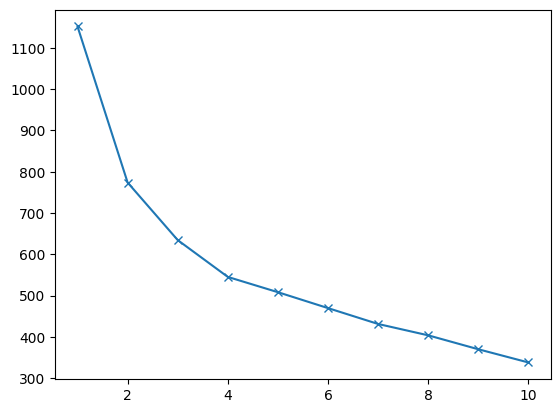

In [10]:
#elbow method untuk mencari nilai k
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, marker='x')
plt.show()

Berdasarkan metode tersebut didapatkan bahwa nilai K yaitu 3

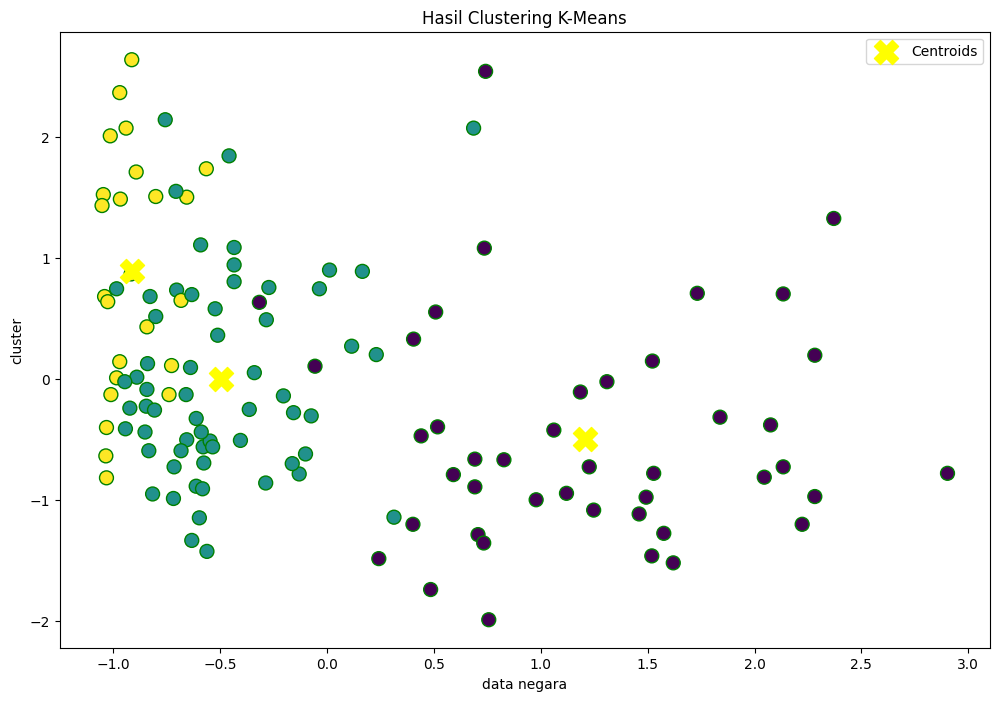

In [11]:
#clustering K=3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df_hapus_outlier['label']= kmeans.fit_predict(data_scaled)

plt.figure(figsize=(12,8))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=df_hapus_outlier['label'], cmap='viridis', s=100, edgecolor='green', linestyle='-')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='X', label='Centroids')
plt.title('Hasil Clustering K-Means')
plt.xlabel('data negara')
plt.ylabel('cluster')
plt.legend()
plt.show()

Berdasarkan grafik scatter diapatkan hasil clustering K-Means dengan nilai K= 3 yaitu seperti gambar diatas. Data dengan lingkaran berwarna kuning merupakan data dengan nilai cluster 2 (tertinggi), lingkaran berwarna hijau merupakan data dengan nilai 1 (menengah), dan lingkaran berwarna hitam merupakan data dengan. nilai 0 (rendah).

In [12]:
#membuat cluster berdasarkan kmean dan mencari jumlahnya
cluster_labels = kmeans.fit_predict(data_scaled)
preds = kmeans.labels_
jumlah_berdasarkan_kluster=pd.Series(kmeans.labels_).value_counts()
jumlah_berdasarkan_kluster

1    61
0    43
2    24
Name: count, dtype: int64

In [13]:
#melihat tabel data yang telah diurutkan (berdasarkan clustering k mean)
df_hapus_outlier['kmeans_clusters'] = preds
df_hapus_outlier.head(10)

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label,kmeans_clusters
0,90.2,10.0,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,0,0
1,16.6,28.0,6.55,48.6,9930.0,4.490,76.3,1.65,4090.0,1,1
2,27.3,38.4,4.17,31.4,12900.0,16.100,76.5,2.89,4460.0,1,1
3,119.0,62.3,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,0,0
4,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0,2,2
5,14.5,18.9,8.10,16.0,18700.0,20.900,75.8,2.37,10300.0,1,1
6,18.1,20.8,4.40,45.3,6700.0,7.770,73.3,1.69,3220.0,1,1
9,39.2,54.3,5.88,20.7,16000.0,13.800,69.1,1.92,5840.0,1,1
10,13.8,35.0,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0,2,2
11,8.6,69.5,4.97,50.9,41100.0,7.440,76.0,2.16,20700.0,2,2


Berdasarkan data tabel clustering tersebut dapat dilihat bahwa cluster 0 dapat di kategorikan sebagai negara dengan ekonomi dan kesehatan rendah. Cluster 1 merupakan negara dengan ekonomi dan kesehatan menengah. Cluster 2 merupakan negara dengan ekonomi dan kesehatan tinggi.

In [14]:
cluster_labels = kmeans.labels_
df_hapus_outlier['cluster'] = cluster_labels 
cluster_analysis = df_hapus_outlier.groupby('cluster').mean()
cluster_analysis

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label,kmeans_clusters
cluster,,,,,,,,,,,
0,79.688372,28.162767,6.107209,41.143393,3485.372093,9.818721,61.058140,4.705814,1589.720930,0.0,0.0
1,22.095082,37.378689,6.221475,45.190164,10349.344262,7.164082,72.903279,2.297049,5064.655738,1.0,1.0
2,7.995833,54.150000,7.085000,52.104167,26916.666667,3.344625,77.012500,1.841250,18552.083333,2.0,2.0


Data tabel clustering juga didukung oleh data rata-rata nilai cluster yaitu semakin kecil(0) nilai kmeans_clusters, maka semakin besar tingkat kematian anak, sedangkan nilai lainnya semakin kecil. Sebaliknya semakin besar (2) nilai kmeans_clusters, maka semakin kecil tingkat kematian anak, sedangkan nilai lainnya semakin besar. Terakhir, nilai kmeans_clusters menengah (1) berada diantaranya.

<Axes: ylabel='count'>

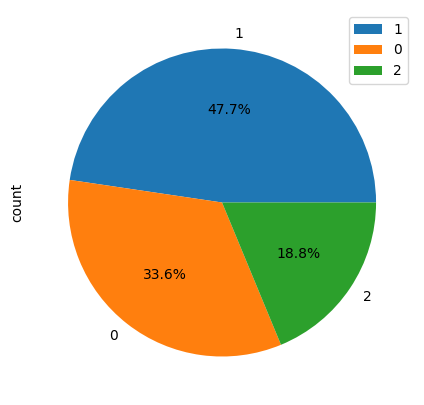

In [15]:
#visualisasi menggunakan grafik pie agar lebih mudah dilihat jumlahnya berdasarkan persen
jumlah_berdasarkan_kluster.plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%', legend=True)

Berdasarkan data tersebut maka, jumlah negara dengan kluster 0 (terendah) menempati nilai ke-2 sehingga perlu dilakukan kembali pengurutan negara, sehingga dana yang diberikan tepat guna

In [43]:
#Mengurutkan data berdasarkan GDP, pendapatan, dan kematian anak dari nilai rata-rata cluster
df_negara1= df_hapus_outlier.Kematian_anak > 79.6
df_negara2= df_hapus_outlier.Pendapatan < 3485
df_negara3= df_hapus_outlier.GDPperkapita < 1589

df_negara=df_hapus_outlier[(df_negara1) & (df_negara2) & (df_negara3)]
df_negara.sort_values(by='GDPperkapita', ascending=True).head(10)

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label,kmeans_clusters,cluster
26,93.6,8.92,11.60,39.2,764.0,12.30,57.7,6.26,231.0,0,0,0
88,89.3,19.10,11.80,92.6,700.0,5.47,60.8,5.02,327.0,0,0,0
37,116.0,41.10,7.91,49.6,609.0,20.80,57.5,6.54,334.0,0,0,0
106,101.0,31.50,5.21,46.2,918.0,7.64,54.5,5.56,419.0,0,0,0
94,90.5,22.80,6.59,34.9,1030.0,12.10,53.1,5.31,459.0,0,0,0
150,90.3,40.20,7.65,57.3,1210.0,1.18,58.7,4.87,488.0,0,0,0
64,114.0,14.90,8.50,35.2,1390.0,2.97,55.6,5.05,547.0,0,0,0
0,90.2,10.00,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0,0,0
56,80.3,23.80,5.69,42.7,1660.0,4.30,65.5,5.71,562.0,0,0,0
25,116.0,19.20,6.74,29.6,1430.0,6.81,57.9,5.87,575.0,0,0,0


Data tabel tersebut diambil berdasarkan faktor ekonomi(pendapatan dan GDP) serta kesehatan(kematian anak) berdasarkan rata" dari setiap kluster. Kemudian, diurutkan kembali berdasarkan nilai GDP karena nilai GDP mempengaruhi banyak faktor lain dalam ekonomi. Maka dapat diambil kesimpulan bahwa 10 negara tersebut merupakan negara yang paling membutuhkan bantuan dari HELP organization berdasarkan data ekonomi dan kesehatan

In [47]:
#pencarian negara secara manual karena data sudah didrop di awal dan dilakukan handling outlier
data_negara= ((df['Negara'][26]), (df['Negara'][88]), (df['Negara'][37]),
             (df['Negara'][106]), (df['Negara'][94]), (df['Negara'][150]), 
              (df['Negara'][64]), (df['Negara'][0]), (df['Negara'][56]), (df['Negara'][25]))
data_negara

('Burundi',
 'Liberia',
 'Congo, Dem. Rep.',
 'Mozambique',
 'Malawi',
 'Togo',
 'Guinea-Bissau',
 'Afghanistan',
 'Gambia',
 'Burkina Faso')

In [48]:
#Menuangkan analisis cluster terhadap peta menggunakan pygal
import pygal
worldmap =  pygal.maps.world.World()

In [51]:
# membuat peta pygal
worldmap =  pygal.maps.world.World() 
  
# judul peta
worldmap.title = 'Bantuan HELP untuk 10 Negara'
  
# menambahkan negara 
worldmap.add('Burundi', {'bi':1})
worldmap.add('Liberia', {'ir':2})
worldmap.add('Congo', {'cg':3})
worldmap.add('Mozambique', {'mz':4})
worldmap.add('Malawi', {'mw':5})
worldmap.add('Togo', {'tg':6})
worldmap.add('Guinea-Bissau', {'gw':7})
worldmap.add('Afghanistan', {'af':8})
worldmap.add('Gambia', {'gm':9})
worldmap.add('Burkina Faso', {'bf':10})

# mendownload peta menjadi file SVG
worldmap.render_to_file('Bantuan_HELP_untuk_10_Negara.svg')

data svg secara live(https://drive.google.com/file/d/1rHHqYjHYvAqgUbfLQVrV6a1B6uKW7tBx/view?usp=drive_link)

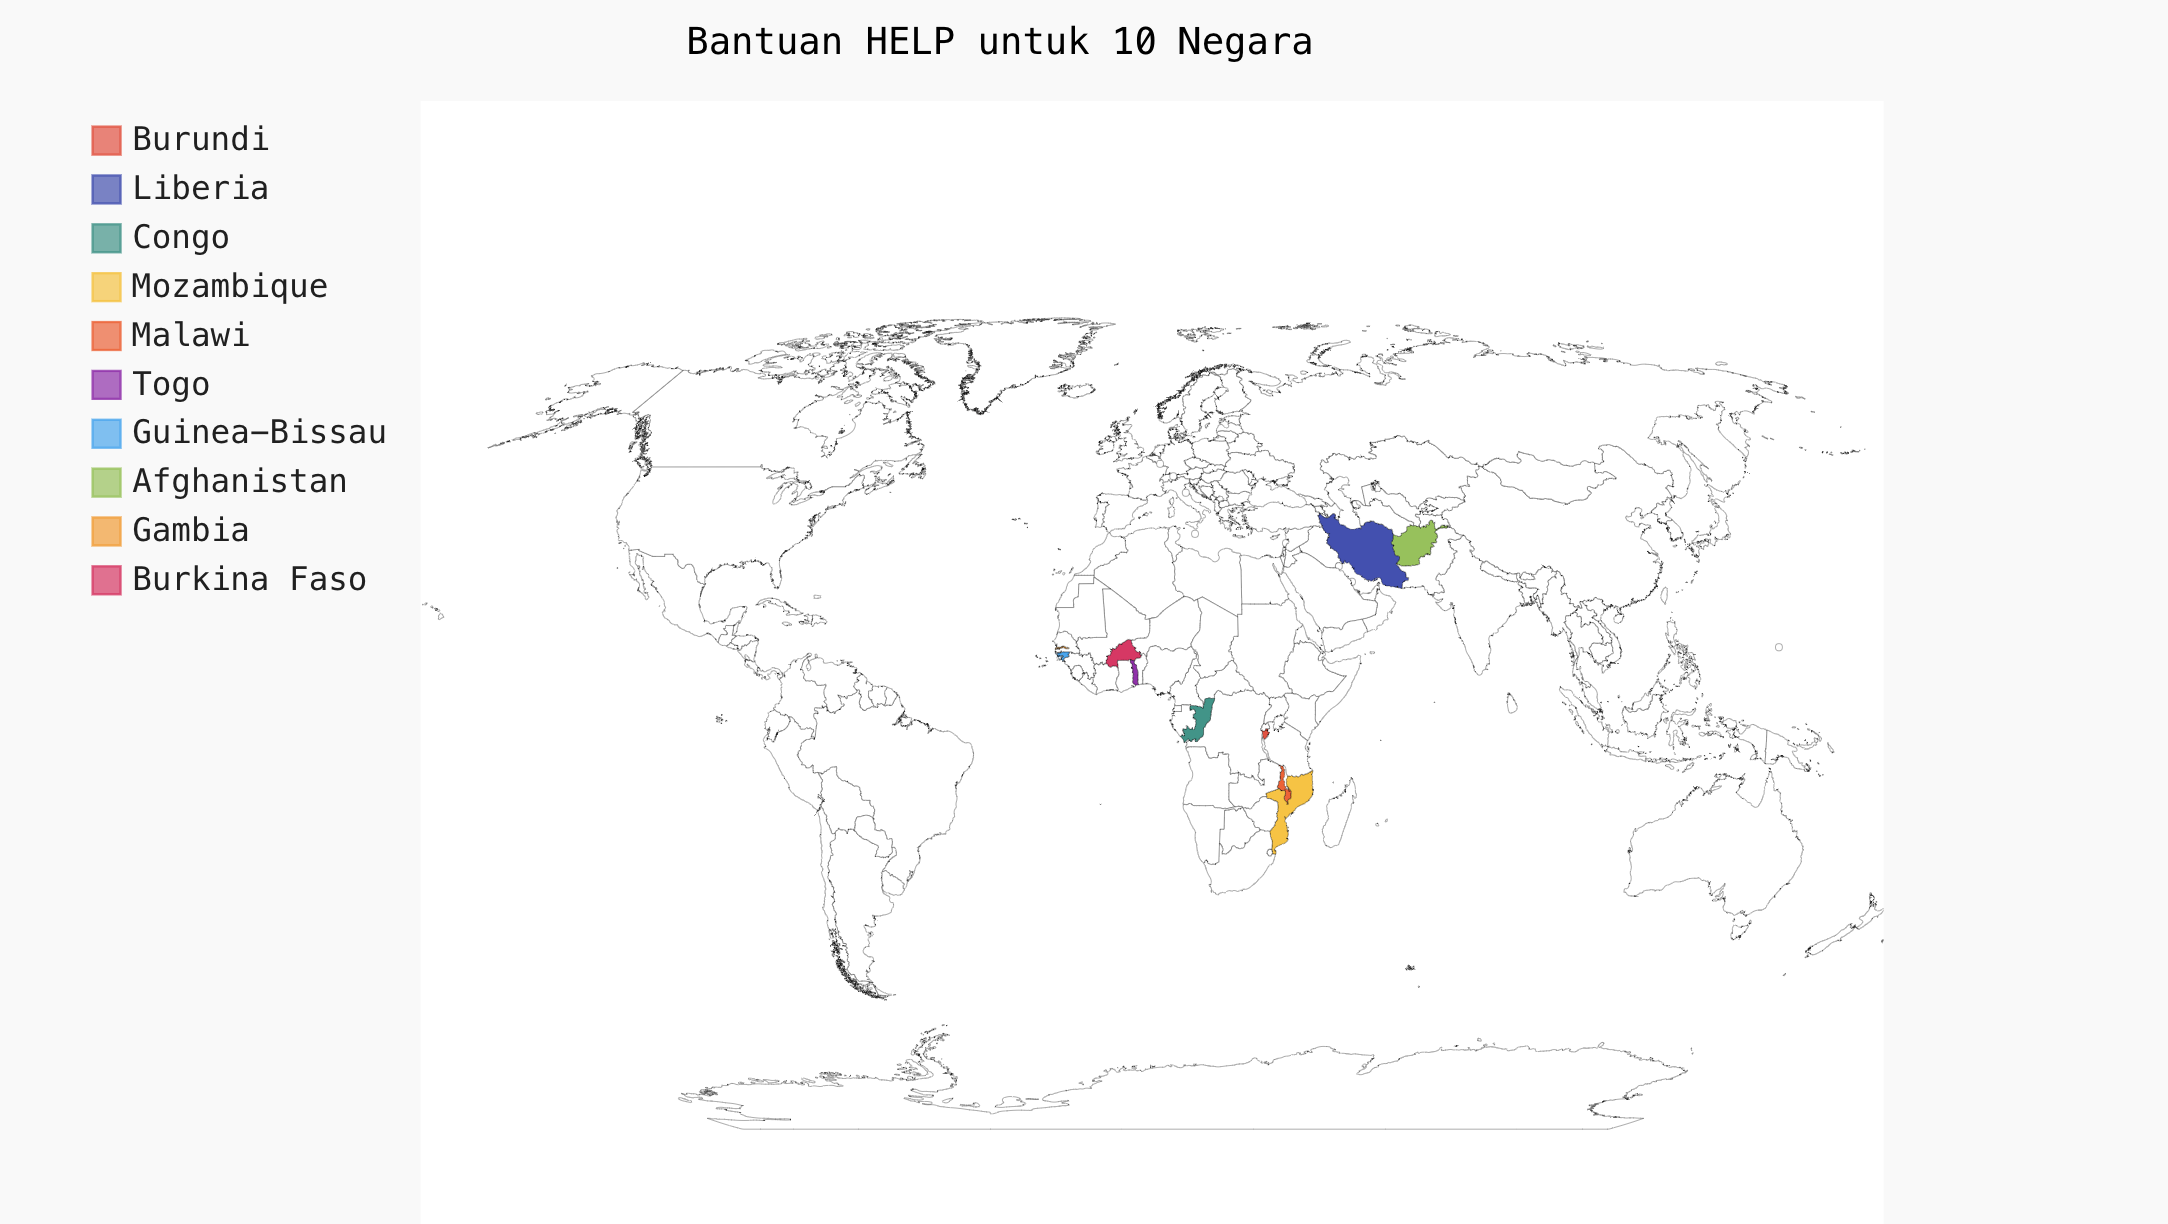

In [52]:
from IPython.display import Image
img = 'Data Negara Bantuan HELP.png'
Image(filename=img)

Berikut merupakan 10 negara yang dapat dipertimbangkan oleh CEO HELP agar segera mendapat bantuan baik dari segi ekonomi maupun kesehatan.